In [2]:
%matplotlib notebook

In [5]:
#Libraries
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, Angle
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

import matplotlib.pyplot as plt
import numpy as np
import requests
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Polygon
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import pandas as pd

from tqdm import tqdm
import requests

from pyvo.dal import sia  #new! for what? Simple Image Access


In [6]:
telemetry1 = pd.read_csv('decam_telemetry_20230817.csv.gz')
streaks1 = pd.read_csv('streaks_augmented_20230817.csv.gz')

In [7]:
telemetry1

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
0,140520,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:25:35.429106,00:25:35.429106,2.10353,1.0,22:08:24.000,-32:59:17.599,116.2500,7.09
1,140521,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:29:50.667562,00:29:50.667562,2.09597,1.0,22:08:23.970,-32:55:57.799,118.9300,6.25
2,140522,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:46:16.576959,00:46:16.576959,31.09820,30.0,18:03:35.240,-30:02:00.600,254.2700,50.20
3,140523,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:47:44.370016,00:47:44.370016,31.09300,30.0,18:03:35.250,-30:02:00.802,254.1500,50.50
4,140524,u,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-10-20 00:49:47.211636,00:49:47.211636,31.09170,30.0,18:03:35.240,-30:02:00.802,253.9900,50.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506513,1228730,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:42:53.917964,08:42:53.917964,81.10140,80.0,03:30:36.090,-28:05:58.200,97.1620,36.05
506514,1228731,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:44:44.058111,08:44:44.058111,71.12170,70.0,03:30:36.079,-28:05:58.200,97.0003,35.66
506515,1228732,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:46:22.681357,08:46:22.681357,71.10870,70.0,03:30:36.090,-28:05:58.200,96.8515,35.30
506516,1228733,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-08-03 08:48:02.549261,08:48:02.549261,91.09020,90.0,03:30:36.112,-28:05:58.099,96.7036,34.94


In [8]:
streaks1

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [5]:
#telemetry1['EXPNUM'==958013]
telemetry1.loc[telemetry1['EXPNUM']==958013]

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
401619,958013,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2020-11-26 07:21:51.110828,07:21:51.110828,91.2403,90.0,09:51:16.708,-08:58:26.299,71.3041,45.17


In [6]:
row_958013 = telemetry1.loc[telemetry1['EXPNUM']==958013]
ra = row_958013['RA']
dec = row_958013['DEC']
print(ra.values, dec.values)

['09:51:16.708'] ['-08:58:26.299']


In [5]:
coord = SkyCoord(ra=row_958013['RA'].values[0], dec=row_958013['DEC'].values[0], unit=u.deg)
print(coord.icrs.ra.value, coord.icrs.dec.value)

NameError: name 'row_958013' is not defined

In [6]:
telemetry1.columns

Index(['EXPNUM', 'BAND', 'TELESCOP', 'OBSERVAT', 'INSTRUME', 'OBS-LONG',
       'OBS-LAT', 'OBS-ELEV', 'TELEQUIN', 'TIMESYS', 'DATE-OBS', 'TIME-OBS',
       'DARKTIME', 'EXPTIME', 'RA', 'DEC', 'AZ', 'ZD'],
      dtype='object')

In [5]:
expnum_counts = streaks1['expnum'].value_counts()
#expnums_mas_8 = expnum_counts[expnum_counts > 8].index
expnums_mas_3 = expnum_counts[expnum_counts > 3].index
streaks_filtradas = streaks1[streaks1['expnum'].isin(expnums_mas_3)]
telemetry1_filtrado = telemetry1[telemetry1['EXPNUM'].isin(streaks_filtradas['expnum'])]

In [6]:
streaks_filtradas

,filename,rnum,ra_1,ra_2,ra_3,ra_4,dec_1,dec_2,dec_3,dec_4,expnum,ccdnum,band
0,D00145425_g_c03_r4148p01_hstreak.fits,3,1.159330,1.160919,1.164310,1.162720,-28.724241,-28.724212,-28.857155,-28.857183,145425,3,g
1,D00145425_g_c06_r4148p01_hstreak.fits,1,0.986677,0.986711,0.644209,0.644186,-29.032018,-29.034283,-29.037208,-29.034944,145425,6,g
2,D00145425_g_c09_r4148p01_hstreak.fits,1,0.452852,0.452942,0.109842,0.109782,-29.193042,-29.199694,-29.203265,-29.196615,145425,9,g
3,D00145425_g_c15_r4148p01_hstreak.fits,1,0.286716,0.286812,0.630816,0.630741,-29.363308,-29.358405,-29.362739,-29.367644,145425,15,g
4,D00145425_g_c16_r4148p01_hstreak.fits,1,0.985852,0.987446,0.987211,0.985615,-29.216748,-29.216752,-29.366385,-29.366381,145425,16,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879115,D01223535_g_c05_r6224p01_hstreak.fits,1,323.500201,323.502653,323.444690,323.442238,-17.828499,-17.830897,-17.884254,-17.881855,1223535,5,g
879116,D01223535_g_c31_r6224p01_hstreak.fits,1,324.355544,324.369908,324.372363,324.357994,-18.392109,-18.391941,-18.541070,-18.541235,1223535,31,g
879117,D01223535_g_c56_r6224p01_hstreak.fits,1,322.914589,322.934330,322.849385,322.829651,-19.193809,-19.210870,-19.298406,-19.281342,1223535,56,g
879118,D01223535_g_c58_r6224p01_hstreak.fits,1,323.771850,323.783894,323.835739,323.823696,-19.214779,-19.204086,-19.255903,-19.266598,1223535,58,g


In [7]:
telemetry1_filtrado

,EXPNUM,BAND,TELESCOP,OBSERVAT,INSTRUME,OBS-LONG,OBS-LAT,OBS-ELEV,TELEQUIN,TIMESYS,DATE-OBS,TIME-OBS,DARKTIME,EXPTIME,RA,DEC,AZ,ZD
1849,145434,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 04:53:58.963709,04:53:58.963709,31.1660,30.0,00:03:06.361,-29:47:35.696,259.1000,37.55
1856,145505,r,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:18:03.596634,06:18:03.596634,61.1374,60.0,02:24:27.068,-04:16:03.299,307.0800,37.89
1857,145506,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:19:34.192876,06:19:34.192876,111.1910,110.0,02:24:27.061,-04:16:03.500,306.7000,38.12
1858,145507,i,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:21:55.581522,06:21:55.581522,111.1170,110.0,02:23:42.961,-04:15:07.398,305.7800,38.70
1859,145508,z,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2012-11-02 06:24:15.881703,06:24:15.881703,241.1170,240.0,02:23:42.900,-04:15:08.298,305.1700,39.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504522,1223531,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:31:20.267482,04:31:20.267482,91.0796,90.0,21:35:26.250,-23:10:46.700,81.3260,26.43
504523,1223532,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:33:18.720174,04:33:18.720174,91.0856,90.0,21:32:30.502,-21:38:18.200,77.0527,25.96
504524,1223533,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:35:19.212277,04:35:19.212277,91.1041,90.0,21:29:40.132,-20:06:01.501,72.7274,25.63
504525,1223534,g,CTIO 4.0-m telescope,CTIO,DECam,70.8149,-30.1661,2215,2000,UTC,2023-07-21 04:37:18.092169,04:37:18.092169,91.1129,90.0,21:36:50.839,-20:04:59.099,73.9834,26.71


In [8]:
expnum_counts[expnum_counts > 3] # How many times that exposure appear in the dataset

expnum
146084     61
146086     61
146085     61
146082     61
146083     61
           ..
563488      4
1033561     4
563493      4
563500      4
425829      4
Name: count, Length: 78284, dtype: int64

In [9]:
#expnums_mas_8 = expnum_counts[expnum_counts > 8].index.tolist() # Which are those exposures that have more than 8 streaks
#print(expnums_mas_8)
expnums_mas_3 = expnum_counts[expnum_counts > 3].index.tolist() # Which are those exposures that have more than 3 streaks


In [15]:
#expnumtry = telemetry1_filtrado['EXPNUM'].unique()  # Usaria toooooodos los datos filtrados :p
#expnumtry = telemetry1_filtrado['EXPNUM'].drop_duplicates().sample(10)     # Usando los datos filtrados
                                                                      # , random_state=42) # Random exposures
expnumtry = telemetry1['EXPNUM'].drop_duplicates().sample(500)  # Usando una muestra de los datos sin filtrar, para ver si hay mas starlinks con menos de 8 streaks

In [16]:
site = EarthLocation.of_site('ctio')

In [17]:
# Contenedores de resultados
expnum_starlink   = []   # exposures que tuvieron al menos 1 STARLINK
satmap_starlink   = []   # lista de nombres Starlink para cada exposure
satmap_completo   = {}  
todos_satelites = {} 
starlinks_en_exp = []
fov_radius=1

In [ ]:
for exp in tqdm(expnumtry, desc="Buscando STARLINKs"):
    #fila = telemetry1_filtrado[telemetry1_filtrado['EXPNUM'] == exp].iloc[0] #row
    fila = telemetry1[telemetry1['EXPNUM'] == exp].iloc[0] #row

    #print(fila)
    try:
        ra = fila['RA']
        dec = fila['DEC']
        latitude = fila ['OBS-LAT']
        longitude = fila['OBS-LONG']
        elevation = fila['OBS-ELEV']
        exptime = fila['EXPTIME']
        timeobs = fila['TIME-OBS']
        dateobs = fila['DATE-OBS']
        duration = fila['EXPTIME']
        start_time_jd = Time(fila['DATE-OBS']).jd

        # Conversión de coordenadas y fecha
        coord = SkyCoord(ra=fila['RA'], dec=fila['DEC'], unit=u.deg)
        ra_center = coord.icrs.ra.value
        dec_center = coord.icrs.dec.value
        print(f"Running query for expnum{exp}")
        
        # URL para la API
        url = f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude={latitude}&longitude={longitude}&elevation={elevation}&start_time_jd={start_time_jd}&duration={duration}&ra={ra_center}&dec={dec_center}&fov_radius={fov_radius}&group_by=satellite"
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()['data']['satellites']            
        
        # Guardar todos los satélites si quieres
        todos_satelites[exp] = list(data.keys())

        # Filtrar Starlink
        starlinks = [sat for sat in data if 'STARLINK' in sat.upper()]  # It was hard to find STARLINKs in a small sample, so I tried with COSMOS instead, they seem more common
        print(exp, starlinks)
        if starlinks:
            expnum_starlink.append(exp)
            starlinks_en_exp.append(starlinks)

    except Exception as e:
        print(f"⚠️ Error en expnum {exp}: {e}")
        continue

# Crear DataFrame con resultados
df_starlink = pd.DataFrame({
    'EXPNUM': expnum_starlink,
    'starlinks': starlinks_en_exp
})

# Vista rápida
print(df_starlink.head())

Buscando STARLINKs:   0%|                                                                             | 0/500 [00:00<?, ?it/s]

Running query for expnum876723


Buscando STARLINKs:   0%|▏                                                                  | 1/500 [00:34<4:50:53, 34.98s/it]

876723 []
Running query for expnum516482


Buscando STARLINKs:   0%|▎                                                                  | 2/500 [00:55<3:39:27, 26.44s/it]

516482 []
Running query for expnum657139


Buscando STARLINKs:   1%|▍                                                                  | 3/500 [01:19<3:31:11, 25.50s/it]

657139 []
Running query for expnum388159


Buscando STARLINKs:   1%|▌                                                                  | 4/500 [01:43<3:24:27, 24.73s/it]

388159 []
Running query for expnum319658


Buscando STARLINKs:   1%|▋                                                                  | 5/500 [02:07<3:22:57, 24.60s/it]

319658 []
Running query for expnum943793


Buscando STARLINKs:   1%|▊                                                                  | 6/500 [02:46<4:01:50, 29.37s/it]

943793 []
Running query for expnum634064


Buscando STARLINKs:   1%|▉                                                                  | 7/500 [03:06<3:37:34, 26.48s/it]

634064 []
Running query for expnum1040330


Buscando STARLINKs:   2%|█                                                                  | 8/500 [03:36<3:46:05, 27.57s/it]

1040330 ['STARLINK-1103 (44921)', 'STARLINK-1551 (46075)']
Running query for expnum1063531


Buscando STARLINKs:   2%|█▏                                                                 | 9/500 [03:53<3:16:38, 24.03s/it]

1063531 []
Running query for expnum780258


Buscando STARLINKs:   2%|█▎                                                                | 10/500 [04:20<3:25:29, 25.16s/it]

780258 []
Running query for expnum299285


Buscando STARLINKs:   2%|█▍                                                                | 11/500 [04:43<3:18:12, 24.32s/it]

299285 []
Running query for expnum1191188


Buscando STARLINKs:   2%|█▌                                                                | 12/500 [05:08<3:21:24, 24.76s/it]

1191188 []
Running query for expnum857734


Buscando STARLINKs:   3%|█▋                                                                | 13/500 [05:41<3:39:49, 27.08s/it]

857734 []
Running query for expnum977343


Buscando STARLINKs:   3%|█▊                                                                | 14/500 [06:01<3:22:59, 25.06s/it]

977343 []
Running query for expnum267248


Buscando STARLINKs:   3%|█▉                                                                | 15/500 [06:25<3:18:12, 24.52s/it]

267248 []
Running query for expnum443467


Buscando STARLINKs:   3%|██                                                                | 16/500 [06:48<3:15:22, 24.22s/it]

443467 []
Running query for expnum596549


Buscando STARLINKs:   3%|██▏                                                               | 17/500 [07:11<3:12:40, 23.94s/it]

596549 []
Running query for expnum365056


Buscando STARLINKs:   4%|██▍                                                               | 18/500 [07:42<3:27:28, 25.83s/it]

365056 []
Running query for expnum547262


Buscando STARLINKs:   4%|██▌                                                               | 19/500 [08:06<3:23:01, 25.33s/it]

547262 []
Running query for expnum846824


Buscando STARLINKs:   4%|██▋                                                               | 20/500 [08:46<3:58:19, 29.79s/it]

846824 []
Running query for expnum1104872


Buscando STARLINKs:   4%|██▊                                                               | 21/500 [09:21<4:09:27, 31.25s/it]

1104872 []
Running query for expnum759706


Buscando STARLINKs:   4%|██▉                                                               | 22/500 [09:55<4:15:37, 32.09s/it]

759706 []
Running query for expnum523477


Buscando STARLINKs:   5%|███                                                               | 23/500 [10:16<3:49:55, 28.92s/it]

523477 []
Running query for expnum388112


Buscando STARLINKs:   5%|███▏                                                              | 24/500 [10:40<3:36:52, 27.34s/it]

388112 []
Running query for expnum523443


Buscando STARLINKs:   5%|███▎                                                              | 25/500 [10:45<2:44:20, 20.76s/it]

523443 []
Running query for expnum961335


Buscando STARLINKs:   5%|███▍                                                              | 26/500 [11:04<2:40:06, 20.27s/it]

961335 []
Running query for expnum885640


Buscando STARLINKs:   5%|███▌                                                              | 27/500 [11:39<3:14:13, 24.64s/it]

885640 []
Running query for expnum1009485


Buscando STARLINKs:   6%|███▋                                                              | 28/500 [12:02<3:08:30, 23.96s/it]

1009485 []
Running query for expnum723356


Buscando STARLINKs:   6%|███▊                                                              | 29/500 [12:31<3:20:03, 25.48s/it]

723356 []
Running query for expnum581854


Buscando STARLINKs:   6%|███▉                                                              | 30/500 [12:53<3:12:09, 24.53s/it]

581854 []
Running query for expnum379917


Buscando STARLINKs:   6%|████                                                              | 31/500 [13:11<2:56:55, 22.63s/it]

379917 []
Running query for expnum227429


Buscando STARLINKs:   6%|████▏                                                             | 32/500 [13:34<2:58:12, 22.85s/it]

227429 []
Running query for expnum195923


Buscando STARLINKs:   7%|████▎                                                             | 33/500 [13:57<2:56:11, 22.64s/it]

195923 []
Running query for expnum662920


Buscando STARLINKs:   7%|████▍                                                             | 34/500 [14:27<3:13:44, 24.95s/it]

662920 []
Running query for expnum711044


Buscando STARLINKs:   7%|████▌                                                             | 35/500 [14:53<3:16:25, 25.35s/it]

711044 []
Running query for expnum1000476


Buscando STARLINKs:   7%|████▊                                                             | 36/500 [15:04<2:42:10, 20.97s/it]

1000476 []
Running query for expnum868117


Buscando STARLINKs:   7%|████▉                                                             | 37/500 [15:37<3:09:07, 24.51s/it]

868117 []
Running query for expnum1116470


Buscando STARLINKs:   8%|█████                                                             | 38/500 [16:06<3:20:20, 26.02s/it]

1116470 []
Running query for expnum1108541


Buscando STARLINKs:   8%|█████▏                                                            | 39/500 [16:18<2:47:22, 21.78s/it]

1108541 ['STARLINK-1275 (45407)', 'STARLINK-2379 (47798)', 'STARLINK-3138 (49430)']
Running query for expnum266614


Buscando STARLINKs:   8%|█████▎                                                            | 40/500 [16:41<2:50:35, 22.25s/it]

266614 []
Running query for expnum292542


Buscando STARLINKs:   8%|█████▍                                                            | 41/500 [17:04<2:49:40, 22.18s/it]

292542 []
Running query for expnum348237


Buscando STARLINKs:   8%|█████▌                                                            | 42/500 [17:27<2:52:59, 22.66s/it]

348237 []
Running query for expnum448712


Buscando STARLINKs:   9%|█████▋                                                            | 43/500 [17:55<3:03:07, 24.04s/it]

448712 []
Running query for expnum165521


Buscando STARLINKs:   9%|█████▊                                                            | 44/500 [18:16<2:56:31, 23.23s/it]

165521 []
Running query for expnum908196


Buscando STARLINKs:   9%|█████▉                                                            | 45/500 [18:49<3:18:09, 26.13s/it]

908196 []
Running query for expnum1119859


Buscando STARLINKs:   9%|██████                                                            | 46/500 [19:02<2:47:36, 22.15s/it]

1119859 []
Running query for expnum1135189


Buscando STARLINKs:   9%|██████▏                                                           | 47/500 [19:27<2:55:12, 23.21s/it]

1135189 ['STARLINK-1061 (44766)']
Running query for expnum1185213


Buscando STARLINKs:  10%|██████▎                                                           | 48/500 [19:56<3:08:11, 24.98s/it]

1185213 ['STARLINK-2592 (48408)']
Running query for expnum985192


Buscando STARLINKs:  10%|██████▍                                                           | 49/500 [20:15<2:53:49, 23.13s/it]

985192 []
Running query for expnum318136


Buscando STARLINKs:  10%|██████▌                                                           | 50/500 [20:38<2:51:35, 22.88s/it]

318136 []
Running query for expnum1071511


Buscando STARLINKs:  10%|██████▋                                                           | 51/500 [21:00<2:49:51, 22.70s/it]

1071511 []
Running query for expnum451541


Buscando STARLINKs:  10%|██████▊                                                           | 52/500 [21:11<2:24:29, 19.35s/it]

451541 []
Running query for expnum831650


Buscando STARLINKs:  11%|██████▉                                                           | 53/500 [21:51<3:09:00, 25.37s/it]

831650 []
Running query for expnum789635


Buscando STARLINKs:  11%|███████▏                                                          | 54/500 [22:25<3:27:32, 27.92s/it]

789635 []
Running query for expnum903105


Buscando STARLINKs:  11%|███████▎                                                          | 55/500 [23:01<3:45:10, 30.36s/it]

903105 []
Running query for expnum1224660


Buscando STARLINKs:  11%|███████▍                                                          | 56/500 [23:36<3:56:14, 31.93s/it]

1224660 ['STARLINK-2407 (47822)', 'STARLINK-4589 (53746)']
Running query for expnum660108


Buscando STARLINKs:  11%|███████▌                                                          | 57/500 [24:06<3:51:31, 31.36s/it]

660108 []
Running query for expnum944886


Buscando STARLINKs:  12%|███████▋                                                          | 58/500 [25:02<4:44:13, 38.58s/it]

944886 []
Running query for expnum426829


Buscando STARLINKs:  12%|███████▊                                                          | 59/500 [25:32<4:25:15, 36.09s/it]

426829 []
Running query for expnum568215


Buscando STARLINKs:  12%|███████▉                                                          | 60/500 [25:59<4:04:47, 33.38s/it]

568215 []
Running query for expnum730895


Buscando STARLINKs:  12%|████████                                                          | 61/500 [26:29<3:57:24, 32.45s/it]

730895 []
Running query for expnum200972


Buscando STARLINKs:  12%|████████▏                                                         | 62/500 [26:52<3:35:50, 29.57s/it]

200972 []
Running query for expnum984831


Buscando STARLINKs:  13%|████████▎                                                         | 63/500 [27:15<3:21:00, 27.60s/it]

984831 ['STARLINK-1032 (44737)', 'STARLINK-1034 (44739)']
Running query for expnum1012865


Buscando STARLINKs:  13%|████████▍                                                         | 64/500 [27:36<3:05:13, 25.49s/it]

1012865 []
Running query for expnum1071291


Buscando STARLINKs:  13%|████████▌                                                         | 65/500 [27:56<2:52:22, 23.78s/it]

1071291 []
Running query for expnum350082


Buscando STARLINKs:  13%|████████▋                                                         | 66/500 [28:27<3:09:12, 26.16s/it]

350082 []
Running query for expnum165080


Buscando STARLINKs:  13%|████████▊                                                         | 67/500 [28:48<2:57:02, 24.53s/it]

165080 []
Running query for expnum777175


Buscando STARLINKs:  14%|████████▉                                                         | 68/500 [29:21<3:14:38, 27.03s/it]

777175 []
Running query for expnum411650


Buscando STARLINKs:  14%|█████████                                                         | 69/500 [29:41<2:59:14, 24.95s/it]

411650 []
Running query for expnum356019


Buscando STARLINKs:  14%|█████████▏                                                        | 70/500 [29:53<2:31:28, 21.14s/it]

356019 []
Running query for expnum959772


Buscando STARLINKs:  14%|█████████▎                                                        | 71/500 [30:08<2:17:25, 19.22s/it]

959772 ['STARLINK-1495 (45761)']
Running query for expnum1105882


Buscando STARLINKs:  14%|█████████▌                                                        | 72/500 [30:32<2:26:45, 20.57s/it]

1105882 []
Running query for expnum859365


Buscando STARLINKs:  15%|█████████▋                                                        | 73/500 [31:07<2:58:50, 25.13s/it]

859365 []
Running query for expnum796111


Buscando STARLINKs:  15%|█████████▊                                                        | 74/500 [31:40<3:14:39, 27.42s/it]

796111 []
Running query for expnum627861


Buscando STARLINKs:  15%|█████████▉                                                        | 75/500 [32:07<3:12:13, 27.14s/it]

627861 []
Running query for expnum749238


Buscando STARLINKs:  15%|██████████                                                        | 76/500 [32:36<3:16:00, 27.74s/it]

749238 []
Running query for expnum232652


Buscando STARLINKs:  15%|██████████▏                                                       | 77/500 [33:00<3:08:09, 26.69s/it]

232652 []
Running query for expnum694290


Buscando STARLINKs:  16%|██████████▎                                                       | 78/500 [33:30<3:15:11, 27.75s/it]

694290 []
Running query for expnum747702


Buscando STARLINKs:  16%|██████████▍                                                       | 79/500 [33:38<2:31:50, 21.64s/it]

747702 []
Running query for expnum315024


Buscando STARLINKs:  16%|██████████▌                                                       | 80/500 [34:00<2:32:52, 21.84s/it]

315024 []
Running query for expnum164728


Buscando STARLINKs:  16%|██████████▋                                                       | 81/500 [34:24<2:36:44, 22.45s/it]

164728 []
Running query for expnum769152


Buscando STARLINKs:  16%|██████████▊                                                       | 82/500 [34:51<2:47:00, 23.97s/it]

769152 []
Running query for expnum406554


Buscando STARLINKs:  17%|██████████▉                                                       | 83/500 [35:12<2:39:14, 22.91s/it]

406554 []
Running query for expnum867432


Buscando STARLINKs:  17%|███████████                                                       | 84/500 [35:45<2:59:25, 25.88s/it]

867432 []
Running query for expnum673770


Buscando STARLINKs:  17%|███████████▏                                                      | 85/500 [36:12<3:01:46, 26.28s/it]

673770 []
Running query for expnum472565


Buscando STARLINKs:  17%|███████████▎                                                      | 86/500 [36:37<2:59:15, 25.98s/it]

472565 []
Running query for expnum514574


Buscando STARLINKs:  17%|███████████▍                                                      | 87/500 [36:59<2:50:29, 24.77s/it]

514574 []
Running query for expnum678275


Buscando STARLINKs:  18%|███████████▌                                                      | 88/500 [37:20<2:42:49, 23.71s/it]

678275 []
Running query for expnum808264


Buscando STARLINKs:  18%|███████████▋                                                      | 89/500 [37:54<3:02:22, 26.62s/it]

808264 []
Running query for expnum834272


Buscando STARLINKs:  18%|███████████▉                                                      | 90/500 [38:32<3:25:14, 30.04s/it]

834272 []
Running query for expnum191724


Buscando STARLINKs:  18%|████████████                                                      | 91/500 [38:56<3:13:12, 28.34s/it]

191724 []
Running query for expnum857417


Buscando STARLINKs:  18%|████████████▏                                                     | 92/500 [39:26<3:14:57, 28.67s/it]

857417 []
Running query for expnum459931


Buscando STARLINKs:  19%|████████████▍                                                     | 94/500 [39:45<2:02:29, 18.10s/it]

459931 []
Running query for expnum190417
⚠️ Error en expnum 190417: HTTPSConnectionPool(host='dev.satchecker.cps.iau.noirlab.edu', port=443): Max retries exceeded with url: /fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2456377.6759819244&duration=30.0&ra=10.650016111111112&dec=-36.516666111111114&fov_radius=1&group_by=satellite (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000255B615EAD0>: Failed to resolve 'dev.satchecker.cps.iau.noirlab.edu' ([Errno 11001] getaddrinfo failed)"))
Running query for expnum1043261


Buscando STARLINKs:  19%|████████████▌                                                     | 95/500 [40:07<2:11:30, 19.48s/it]

1043261 []
Running query for expnum480272


Buscando STARLINKs:  19%|████████████▋                                                     | 96/500 [40:30<2:18:16, 20.53s/it]

480272 []
Running query for expnum690170


Buscando STARLINKs:  19%|████████████▊                                                     | 97/500 [41:00<2:36:59, 23.37s/it]

690170 []
Running query for expnum607327


Buscando STARLINKs:  20%|████████████▉                                                     | 98/500 [41:24<2:37:17, 23.48s/it]

607327 []
Running query for expnum623354


Buscando STARLINKs:  20%|█████████████                                                     | 99/500 [41:48<2:37:09, 23.51s/it]

623354 []
Running query for expnum508123


Buscando STARLINKs:  20%|█████████████                                                    | 100/500 [42:12<2:37:29, 23.62s/it]

508123 []
Running query for expnum1111833


Buscando STARLINKs:  20%|█████████████▏                                                   | 101/500 [42:35<2:37:14, 23.65s/it]

1111833 []
Running query for expnum858877


Buscando STARLINKs:  20%|█████████████▎                                                   | 102/500 [42:49<2:17:27, 20.72s/it]

858877 []
Running query for expnum417823


Buscando STARLINKs:  21%|█████████████▍                                                   | 103/500 [43:13<2:22:13, 21.50s/it]

417823 []
Running query for expnum797053


Buscando STARLINKs:  21%|█████████████▌                                                   | 104/500 [43:42<2:36:55, 23.78s/it]

797053 []
Running query for expnum904327


Buscando STARLINKs:  21%|█████████████▋                                                   | 105/500 [44:17<3:00:13, 27.38s/it]

904327 []
Running query for expnum257953


Buscando STARLINKs:  21%|█████████████▊                                                   | 106/500 [44:42<2:54:03, 26.51s/it]

257953 []
Running query for expnum1190672


Buscando STARLINKs:  21%|█████████████▉                                                   | 107/500 [45:11<2:58:23, 27.24s/it]

1190672 []
Running query for expnum253188


Buscando STARLINKs:  22%|██████████████                                                   | 108/500 [45:24<2:31:07, 23.13s/it]

253188 []
Running query for expnum366278


Buscando STARLINKs:  22%|██████████████▏                                                  | 109/500 [45:48<2:31:34, 23.26s/it]

366278 []
Running query for expnum573755


Buscando STARLINKs:  22%|██████████████▎                                                  | 110/500 [46:13<2:33:55, 23.68s/it]

573755 []
Running query for expnum255603


Buscando STARLINKs:  22%|██████████████▍                                                  | 111/500 [46:17<1:56:35, 17.98s/it]

255603 []
Running query for expnum981951


Buscando STARLINKs:  22%|██████████████▌                                                  | 112/500 [46:43<2:11:50, 20.39s/it]

981951 ['STARLINK-1699 (46548)']
Running query for expnum401238


Buscando STARLINKs:  23%|██████████████▋                                                  | 113/500 [47:04<2:11:30, 20.39s/it]

401238 []
Running query for expnum709874


Buscando STARLINKs:  23%|██████████████▊                                                  | 114/500 [47:33<2:27:24, 22.91s/it]

709874 []
Running query for expnum681305


Buscando STARLINKs:  23%|██████████████▉                                                  | 115/500 [48:03<2:40:49, 25.06s/it]

681305 []
Running query for expnum237321


Buscando STARLINKs:  23%|███████████████                                                  | 116/500 [48:23<2:31:34, 23.68s/it]

237321 []
Running query for expnum449090


Buscando STARLINKs:  23%|███████████████▏                                                 | 117/500 [48:49<2:35:55, 24.43s/it]

449090 []
Running query for expnum432766


Buscando STARLINKs:  24%|███████████████▎                                                 | 118/500 [49:15<2:37:23, 24.72s/it]

432766 []
Running query for expnum960460


Buscando STARLINKs:  24%|███████████████▍                                                 | 119/500 [49:29<2:17:54, 21.72s/it]

960460 []
Running query for expnum632973


Buscando STARLINKs:  24%|███████████████▌                                                 | 120/500 [49:54<2:23:24, 22.64s/it]

632973 []
Running query for expnum956293


Buscando STARLINKs:  24%|███████████████▋                                                 | 121/500 [50:37<3:00:29, 28.57s/it]

956293 []
Running query for expnum649861


Buscando STARLINKs:  24%|███████████████▊                                                 | 122/500 [51:03<2:55:28, 27.85s/it]

649861 []
Running query for expnum1054799


Buscando STARLINKs:  25%|███████████████▉                                                 | 123/500 [51:25<2:44:46, 26.22s/it]

1054799 ['STARLINK-2319 (47790)']
Running query for expnum252345


Buscando STARLINKs:  25%|████████████████                                                 | 124/500 [51:48<2:37:38, 25.15s/it]

252345 []
Running query for expnum624082


Buscando STARLINKs:  25%|████████████████▎                                                | 125/500 [52:09<2:29:47, 23.97s/it]

624082 []
Running query for expnum645466


Buscando STARLINKs:  25%|████████████████▍                                                | 126/500 [52:27<2:17:52, 22.12s/it]

645466 []
Running query for expnum302901


Buscando STARLINKs:  25%|████████████████▌                                                | 127/500 [52:53<2:24:49, 23.30s/it]

302901 []
Running query for expnum1078921


Buscando STARLINKs:  26%|████████████████▋                                                | 128/500 [53:11<2:15:31, 21.86s/it]

1078921 ['STARLINK-1377 (45547)', 'STARLINK-3108 (49439)']
Running query for expnum1112937


Buscando STARLINKs:  26%|████████████████▊                                                | 129/500 [53:36<2:20:11, 22.67s/it]

1112937 ['STARLINK-3852 (52345)']
Running query for expnum1134279


Buscando STARLINKs:  26%|█████████████████                                                | 131/500 [54:01<1:41:02, 16.43s/it]

1134279 []
Running query for expnum1000793
⚠️ Error en expnum 1000793: HTTPSConnectionPool(host='dev.satchecker.cps.iau.noirlab.edu', port=443): Max retries exceeded with url: /fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459358.807148369&duration=50.0&ra=18.059408055555558&dec=-29.530526944444443&fov_radius=1&group_by=satellite (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000255B615FED0>: Failed to resolve 'dev.satchecker.cps.iau.noirlab.edu' ([Errno 11001] getaddrinfo failed)"))
Running query for expnum1076601


Buscando STARLINKs:  26%|█████████████████▏                                               | 132/500 [54:17<1:39:39, 16.25s/it]

1076601 ['STARLINK-1050 (44755)', 'STARLINK-1328 (45576)']
Running query for expnum791779


Buscando STARLINKs:  27%|█████████████████▎                                               | 133/500 [54:47<2:04:19, 20.32s/it]

791779 []
Running query for expnum916525


Buscando STARLINKs:  27%|█████████████████▍                                               | 134/500 [55:26<2:38:00, 25.90s/it]

916525 []
Running query for expnum582087


Buscando STARLINKs:  27%|█████████████████▌                                               | 135/500 [55:49<2:33:09, 25.18s/it]

582087 []
Running query for expnum856062


Buscando STARLINKs:  27%|█████████████████▋                                               | 136/500 [56:24<2:49:44, 27.98s/it]

856062 []
Running query for expnum744108


Buscando STARLINKs:  27%|█████████████████▊                                               | 137/500 [56:53<2:51:41, 28.38s/it]

744108 []
Running query for expnum1086083


Buscando STARLINKs:  28%|█████████████████▉                                               | 138/500 [57:07<2:25:57, 24.19s/it]

1086083 []
Running query for expnum653677


Buscando STARLINKs:  28%|██████████████████                                               | 139/500 [57:30<2:22:56, 23.76s/it]

653677 []
Running query for expnum547176


Buscando STARLINKs:  28%|██████████████████▏                                              | 140/500 [57:55<2:23:34, 23.93s/it]

547176 []
Running query for expnum1165873


Buscando STARLINKs:  28%|██████████████████▎                                              | 141/500 [58:26<2:35:48, 26.04s/it]

1165873 ['STARLINK-1917 (46767)', 'STARLINK-3612 (51770)', 'STARLINK-5190 (54092)']
Running query for expnum324817


Buscando STARLINKs:  28%|██████████████████▍                                              | 142/500 [58:52<2:35:47, 26.11s/it]

324817 []
Running query for expnum314360


Buscando STARLINKs:  29%|██████████████████▌                                              | 143/500 [59:11<2:22:48, 24.00s/it]

314360 []
Running query for expnum689712


Buscando STARLINKs:  29%|██████████████████▋                                              | 144/500 [59:39<2:30:16, 25.33s/it]

689712 []
Running query for expnum466711


Buscando STARLINKs:  29%|██████████████████▎                                            | 145/500 [1:00:06<2:32:00, 25.69s/it]

466711 []
Running query for expnum234124


In [ ]:
df_starlink

In [21]:
#todos_satelites

#### Some exposures with Starlinks(from the more than 8 streaks)

	1011967	[STARLINK-1963 (47564)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's image, there are two satellites)

	1220859	[STARLINK-3954 (52558)] Confirmed!  (Nothing at Alex's images)

	1103448	[STARLINK-3738 (52117)] Not sure... Doesn't appear with the plot as STARLINK (At Alex's images looks amazing. 5 satellites)
    
    1114861 [STARLINK-1422 (45696)]
    
    1218180	[STARLINK-3210 (49755)]
    
  #### news (using the full telemetry data)

    1157371 [STARLINK-1569 (46039)',  'STARLINK-4093 (53157)',  'STARLINK-4257 (53184)']  Doesn't appear at the plot
     
    949790     [STARLINK-1255 (45399)]  Nothing at the plot

    1170668	[STARLINK-1601 (46120)]
 
    1106509	[STARLINK-3872 (52453)]
 
    1033925	[STARLINK-2559 (48298)]
    
    1132514	[STARLINK-3106 (49164)]
    
	1037961	[STARLINK-1712 (46581)]
    
	1226457	[STARLINK-5145 (54008)]  One Starlink at the plot!
        
	1085358	[STARLINK-2176 (47758)]
    
	1040356	[STARLINK-2566 (48287), STARLINK-2605 (48392)]  Doesn't appear at the plot
    
	1061946	[STARLINK-1324 (45574)]
    
    1165186  [STARLINK-4599 (53631)]
    
    1161606  [STARLINK-4045 (53152)]
    
    1180245  [STARLINK-4137 (53031)]
    
    1021815  [STARLINK-1133 (45064)]
    
  
    
#### Errors    
    
Exposure 157280 have an error with the url

Exposure 166858 have an error with the url

#### Questions

- It's possible that we are making a big restriction with the streaks restriction? (more than 8 streaks) 
- Are the STARLINK named with a different ID? Like SL?
- What's the meaning of the numbers of each satellite? STARLINK - ##### (*****)


Link of Search Satellite Database (it's correct?)

https://www.n2yo.com/satellites/?c=52

## Implementing as function

In [21]:
%who  

#all variables avaiables

Angle	 EarthLocation	 Normalize	 Polygon	 ScalarMappable	 SkyCoord	 Time	 WCS	 coord	 
data	 dateobs	 dec	 dec_center	 df_starlink	 duration	 elevation	 exp	 expnum_counts	 
expnum_starlink	 expnums_mas_3	 expnumtry	 exptime	 fila	 fov_radius	 go	 latitude	 longitude	 
np	 pd	 pio	 plt	 ra	 ra_center	 requests	 response	 satmap_completo	 
satmap_starlink	 site	 starlinks	 starlinks_en_exp	 start_time_jd	 streaks1	 streaks_filtradas	 telemetry1	 telemetry1_filtrado	 
timeobs	 todos_satelites	 tqdm	 u	 url	 


In [9]:
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión/field of view(fov)."""
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}") 

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [10]:
def find_satellites_in_decam_exp(EXPNUM, name='STARLINK', fov=1.0, verbose=True):
    """
    Dada una exposición DECam (EXPNUM), consulta SatChecker y devuelve los satélites
    cuyo nombre contenga 'name' (por defecto STARLINK) que cruzan el campo de visión.
    """
    if EXPNUM not in telemetry1['EXPNUM'].values:  #verifica que exista el expnum
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    #ubication and duration
    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    # Convierte automaticamente horas a grados, si se deja como hora, da error
    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

        
    #SatChecker consult (defined previously)    
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    if name:
        named = {k: v for k, v in sats.items() if name.upper() in k.upper()}
    else:
        named = sats
    
    #Filtrando por nombres del satelite, each satelite is called k
    named = {k: v for k, v in sats.items() if name.upper() in k.upper()}  # .upper para ponerlo todo en mayusculas
        

    # data resume
    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(named)} satélites con nombre '{name}' encontrados.\n")

    return named


In [11]:
def plot_satellites_in_exposure(EXPNUM, name='STARLINK', fov_radius=1.0):
    sats = find_satellites_in_decam_exp(EXPNUM, name=name, fov=fov_radius, verbose=True) # va a filtrar solo los starlink
    
    if not sats:   #si no hay starlinks, no los grafica
        print("No se encontraron satélites para graficar.")
        return
    
    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]
    
    
    #ra y dec en coordenadas amigables
    coord = SkyCoord(ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)) if ':' in str(row['RA']) else SkyCoord(ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg)
    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd

    # Configuración de WCS (proyección del cielo en la gráfica)
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center] #centro de la imagen
    wcs.wcs.cdelt = [0.1, 0.1]  # zoom de la imagen/tamaño de pixel
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    # Plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # Campo de visión
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))

    # Trayectorias de los satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]
        times = [p[2] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiquetar cada satélite
        if coords.ra.deg[0] < coords.ra.deg[-1]:
            ax.text(coords.ra.deg[0], coords.dec.deg[0], sat_name, transform=ax.get_transform('world'), fontsize=6)
        else:
            ax.text(coords.ra.deg[-1], coords.dec.deg[-1], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.show()


In [14]:
plot_satellites_in_exposure(958013)


Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459179.8068415606&duration=90.0&ra=147.81961666666663&dec=-8.973971944444445&fov_radius=1.0&group_by=satellite
Satélites encontrados: ['SL-16 DEB (22408)']

EXPNUM: 958013
DATE-OBS: 2020-11-26 07:21:51.110828 | Duración: 90.0 s
RA: 147.820 deg | DEC: -8.974 deg | FOV: 1.0°
0 satélites con nombre 'STARLINK' encontrados.

No se encontraron satélites para graficar.


### Function but with all the satellites

In [34]:
def run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov_radius, ra, dec):
    """Consulta SatChecker para satélites en el campo de visión (fov)."""
  
    url = (
        f"https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?"
        f"latitude={latitude}&longitude={longitude}&elevation={elevation}&"
        f"start_time_jd={start_time_jd}&duration={duration}&ra={ra}&dec={dec}&"
        f"fov_radius={fov_radius}&group_by=satellite"
    )

    print(f"\nConsultando SatChecker con la siguiente URL:\n{url}")

    try:
        response = requests.get(url, timeout=60)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print("Error al consultar el API:", e)
        return {}

    if 'data' not in data or 'satellites' not in data['data']:
        print("Respuesta sin datos de satélites.")
        return {}

    sats = {
        k: [[p['ra'], p['dec'], p['julian_date']] for p in v['positions']]
        for k, v in data['data']['satellites'].items()
    }

    print(f"Satélites encontrados: {list(sats.keys())}")
    return sats


In [35]:
def find_satellites_in_decam_exp(EXPNUM, fov=1, verbose=True):
    """Dada una exposición DECam (EXPNUM), devuelve todos los satélites detectados en el FOV."""
    if EXPNUM not in telemetry1['EXPNUM'].values:
        print(f"EXPNUM {EXPNUM} no encontrado.")
        return {}

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    latitude = row['OBS-LAT']
    longitude = row['OBS-LONG']
    elevation = row['OBS-ELEV']
    duration = max(float(row['EXPTIME']), 1)
    start_time_jd = Time(row['DATE-OBS']).jd

    try:
        ra = Angle(row['RA'], unit='hourangle').degree if isinstance(row['RA'], str) else float(row['RA'])
    except:
        ra = float(row['RA'])

    try:
        dec = Angle(row['DEC'], unit='deg').degree if isinstance(row['DEC'], str) else float(row['DEC'])
    except:
        dec = float(row['DEC'])

    duration= duration*3
    start_time_jd = (start_time_jd*u.day - duration*u.s).value
    sats = run_satchecker_fov_query(latitude, longitude, elevation, duration, start_time_jd, fov, ra, dec)
    
    

    if verbose:
        print(f"\nEXPNUM: {EXPNUM}")
        print(f"DATE-OBS: {row['DATE-OBS']} | Duración: {duration:.1f} s")
        print(f"RA: {ra:.3f} deg | DEC: {dec:.3f} deg | FOV: {fov}°")
        print(f"{len(sats)} satélites encontrados.\n")

    return sats


In [36]:
def plot_satellites_in_exposure(EXPNUM, fov_radius=1):
    """Grafica todos los satélites detectados en una exposición DECam."""
    sats = find_satellites_in_decam_exp(EXPNUM, fov=fov_radius, verbose=True)

    if not sats:
        print("No se encontraron satélites para graficar.")
        return

    row = telemetry1[telemetry1['EXPNUM'] == EXPNUM].iloc[0]

    coord = SkyCoord(
        ra=row['RA'], dec=row['DEC'], unit=(u.hourangle, u.deg)
    ) if ':' in str(row['RA']) else SkyCoord(
        ra=float(row['RA'])*u.deg, dec=float(row['DEC'])*u.deg
    )

    ra_center = coord.ra.deg
    dec_center = coord.dec.deg
    duration = float(row['EXPTIME'])
    start_time_jd = Time(row['DATE-OBS']).jd
    duration= duration*3
    start_time_jd = (start_time_jd*u.day - duration*u.s).value
    
    
    # WCS
    wcs = WCS(naxis=2)
    wcs.wcs.crpix = [0, 0]
    wcs.wcs.crval = [ra_center, dec_center]
    wcs.wcs.cdelt = [0.1, 0.1]
    wcs.wcs.ctype = ['RA---TAN', 'DEC--TAN']

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(1, 1, 1, projection=wcs)

    # FOV
    center = SkyCoord(ra=ra_center * u.deg, dec=dec_center * u.deg, frame='icrs')
    angles = np.linspace(0, 360, 360) * u.deg
    circle = center.directional_offset_by(angles, fov_radius * u.deg)
    ax.plot(circle.ra.deg, circle.dec.deg, c='0.75', ls='--', label='FOV', transform=ax.get_transform('world'))

    # Satélites
    for sat_name, path in sats.items():
        ra = [p[0] for p in path]
        dec = [p[1] for p in path]

        coords = SkyCoord(ra=ra * u.deg, dec=dec * u.deg)
        ax.plot(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), label=sat_name)
        ax.scatter(coords.ra.deg, coords.dec.deg, transform=ax.get_transform('world'), s=6)

        # Etiqueta con el nombre
        idx = 0 if coords.ra.deg[0] < coords.ra.deg[-1] else -1
        ax.text(coords.ra.deg[idx], coords.dec.deg[idx], sat_name, transform=ax.get_transform('world'), fontsize=6)

    ax.set_aspect('equal')
    ax.legend(bbox_to_anchor=(0.95, 1), loc='upper left', fontsize=6)
    ax.set_xlabel('Right Ascension')
    ax.set_ylabel('Declination')
    ax.set_title(f'Satellite Passes for {EXPNUM} at JD {start_time_jd:.4f} (duration {duration:.1f} s)')
    ax.invert_xaxis()
    ax.grid(True, linestyle='--', color='lightgray')

    plt.draw()



Consultando SatChecker con la siguiente URL:
https://dev.satchecker.cps.iau.noirlab.edu/fov/satellite-passes/?latitude=-30.1661&longitude=70.8149&elevation=2215&start_time_jd=2459893.736285483&duration=270.0&ra=48.45965833333333&dec=-14.602528055555554&fov_radius=1&group_by=satellite
Satélites encontrados: ['CELESTIS 21/VARISAT 1C (52766)', 'COSMOS 1759 (16798)', 'COSMOS 796 (8612)', 'FOSSASAT2E11 (52750)', 'GLOBALSTAR M071 (31576)', 'OBJECT V (52751)', 'ONEWEB-0138 (47284)', 'ONEWEB-0317 (49103)', 'PLANETUM1 (52738)', 'SL-14 R/B (20671)', 'STARLINK-1282 (45409)', 'STARLINK-1350 (45535)', 'STARLINK-1549 (46074)', 'STARLINK-1560 (46036)', 'STARLINK-2275 (48600)', 'STARLINK-2537 (48301)', 'STARLINK-2646 (48642)', 'STARLINK-2648 (48679)', 'STARLINK-2734 (48657)', 'STARLINK-3688 (52310)', 'STARLINK-3722 (52089)', 'STARLINK-3765 (52295)', 'STARLINK-3791 (52269)', 'STARLINK-3930 (52568)', 'STARLINK-3933 (52538)', 'STARLINK-3955 (52561)', 'STARLINK-4254 (52998)', 'STARLINK-4296 (52995)', 'ST

<IPython.core.display.Javascript object>


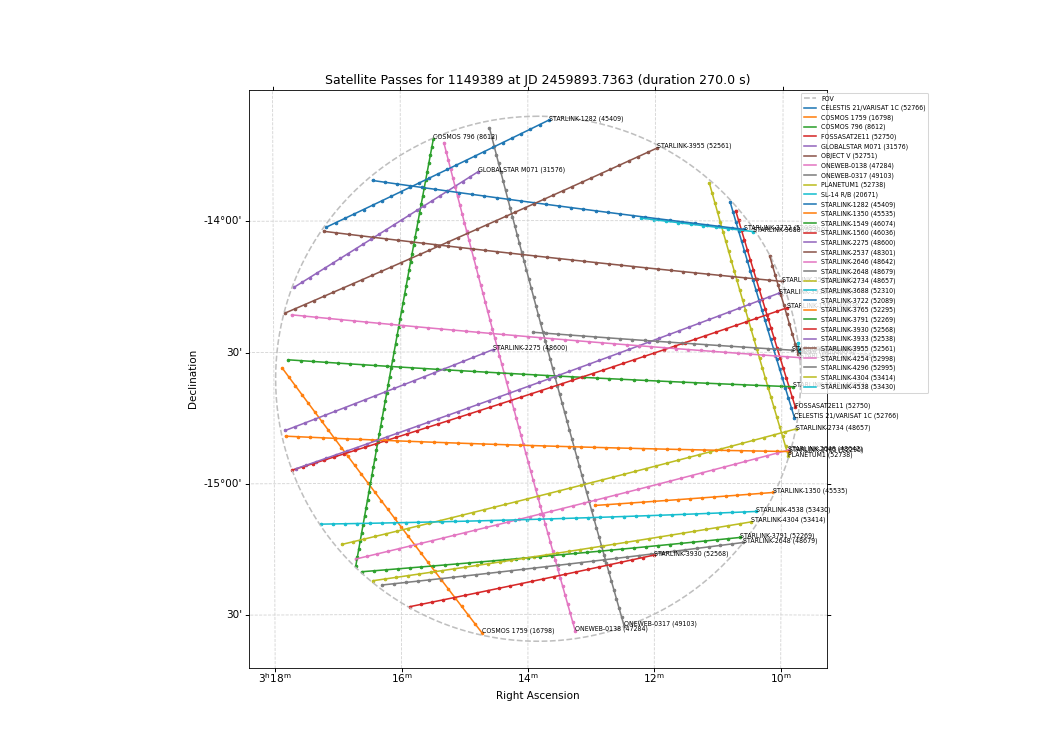

In [37]:
plot_satellites_in_exposure(1103448)